# Logistic Regression/logit regression (lr):

1) used to estimate the probability that an instance
belongs to a particular class.

2) Notice that σ(t) < 0.5 when t < 0, and σ(t) ≥ 0.5 when t ≥ 0, so a Logistic
Regression model predicts 1 if x θ is positive and 0 if it is negative.

3) y(cap) = 0 if p(cap) < 0.5  
            1 if p(cap) ≥ 0.5

Estimating Probabilities

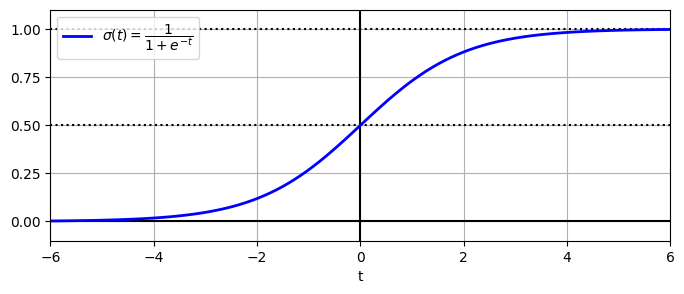

In [1]:
import numpy as np
lim = 6
t = np.linspace(-lim,lim,100)
sig = 1 / (1+np.exp(-t))

import matplotlib.pyplot as plt
plt.figure(figsize=(8,3))
plt.plot([-lim,lim],[0,0],"k-")
plt.plot([-lim,lim],[0.5,0.5],"k:")
plt.plot([-lim,lim],[1,1],"k:")
plt.plot([0,0],[-1.1,1.1],"k-")
plt.plot(t,sig,'b-',linewidth=2,label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
plt.xlabel('t')
plt.legend(loc='upper left')
plt.axis([-lim,lim,-0.1,1.1])
plt.gca().set_yticks([0,0.25,0.5,0.75,1])
plt.grid()
plt.show()


# Training & Cost Function:
1) c(𝛉) = −log(p(cap)) if y = 1 
          − log(1 − p(cap)) if y = 0

>NOTE:
The score t is often called the logit. The name comes from the fact that the logit function, defined
as logit(p) = log(p / (1 – p)), is the inverse of the logistic function. Indeed, if you compute the
logit of the estimated probability p, you will find that the result is t. The logit is also called the
log-odds, since it is the log of the ratio between the estimated probability for the positive class
and the estimated probability for the negative class.

>Note: This cost function makes sense because –log(t) grows very large when t
approaches 0, so the cost will be large if the model estimates a probability close to
0 for a positive instance, and it will also be large if the model estimates a
probability close to 1 for a negative instance. On the other hand, –log(t) is close to
0 when t is close to 1, so the cost will be close to 0 if the estimated probability is
close to 0 for a negative instance or close to 1 for a positive instance, which is
precisely what we want.

2) # Logistic Regression Cost Function (Log Loss)

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^m \left[ y^{(i)} \log(\hat{p}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{p}^{(i)}) \right]
$$

> WARNING
The log loss was not just pulled out of a hat. It can be shown mathematically (using Bayesian
inference) that minimizing this loss will result in the model with the maximum likelihood of
being optimal, assuming that the instances follow a Gaussian distribution around the mean of
their class. When you use the log loss, this is the implicit assumption you are making. The more
wrong this assumption is, the more biased the model will be. Similarly, when we used the MSE
to train linear regression models, we were implicitly assuming that the data was purely linear,
plus some Gaussian noise. So, if the data is not linear (e.g., if it’s quadratic) or if the noise is not
Gaussian (e.g., if outliers are not exponentially rare), then the model will be biased.

3) The bad news is that there is no known closed-form equation to compute the
value of θ that minimizes this cost function (there is no equivalent of the
Normal Equation). The good news is that this cost function is convex, so
Gradient Descent (or any other optimization algorithm) is guaranteed to find
the global minimum (if the learning rate is not too large and you wait long
enough).

# Logistic Cost Function Partial Derivatives

$$
\frac{\partial}{\partial \theta_j} J(\theta) = 
\frac{1}{m} \sum_{i=1}^m \left( \sigma \left( \theta^\top x^{(i)} \right) - y^{(i)} \right) x_j^{(i)}
$$

4) for each instance it computes
the prediction error and multiplies it by the j feature value, and then it computes
the average over all training instances. Once you have the
gradient vector containing all the partial derivatives, you can use it in the
Batch Gradient Descent algorithm. That’s it: you now know how to train a
Logistic Regression model. For Stochastic GD you would take one instance
at a time, and for Mini-batch GD you would use a mini-batch at a time.





# Decision Boundaries

In [6]:
# training a lr from iris dataset for only classifying iris virginica type based on petal width feature.
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [5]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [6]:
iris.target.head(3)

0    0
1    0
2    0
Name: target, dtype: int32

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == "virginica"
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=42)

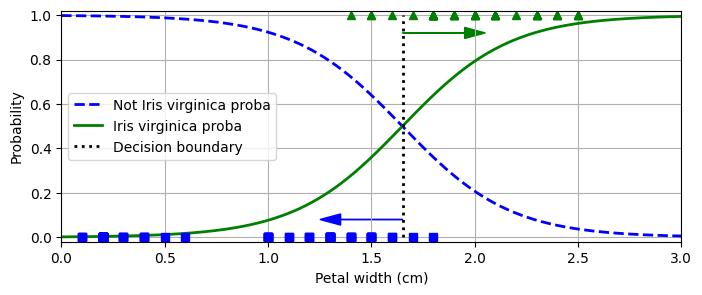

In [9]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3))  # extra code – not needed, just formatting
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

# extra code – this section beautifies and saves Figure 4–23
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()

plt.show()

In [10]:
decision_boundary

1.6516516516516517

In [11]:
log_reg.predict([[1.7],[1.5]])

array([ True, False])

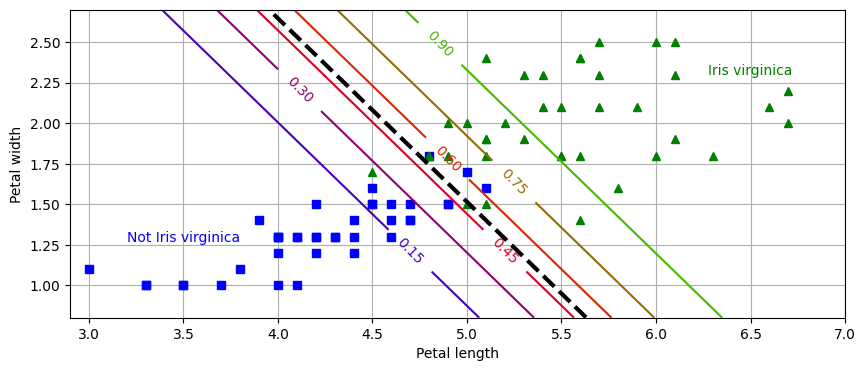

In [13]:
# extra code – this cell generates and saves Figure 4–24

X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

# for the contour plot
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]  # one instance per point on the figure
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

# for the decision boundary
left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0, 1])

plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()
plt.show()

# Insights:
1)  Above about 2 cm the classifier is highly confident that the flower is an
Iris virginica (it outputs a high probability for that class), while below 1 cm it is
highly confident that it is not an Iris virginica (high probability for the “Not Iris
virginica” class). In between these extremes, the classifier is unsure. 

2) there is a decision boundary(linear boundary) at around 1.6 cm where both probabilities
are equal to 50%: if the petal width is greater than 1.6 cm the classifier will predict
that the flower is an Iris virginica, and otherwise it will predict that it is not (even
if it is not very confident).

> NOTE
The hyperparameter controlling the regularization strength of a Scikit-Learn
LogisticRegression model is not alpha (as in other linear models), but its inverse: C. The
higher the value of C, the less the model is regularized.

3) Just like the other linear models, logistic regression models can be regularized
using ℓ1 or ℓ2 penalties. Scikit-Learn actually adds an ℓ2 penalty by default.




# Softmax Regression: 
1) The idea is simple: when given an instance x, the softmax regression model first
computes a score s_k(x) for each class k, then estimates the probability of each class
by applying the softmax function (also called the normalized exponential) to the
scores.

>Softmax Score for Class \( k \)

$$
s_k(x) = \theta^{(k)^\top} x
$$

2) Note that each class has its own dedicated parameter vector θ^(k) . All these vectors
are typically stored as rows in a parameter matrix Θ.

3) Softmax Function: 

$$
\hat{p}_k = \sigma(s(x))_k = \frac{\exp(s_k(x))}{\sum_{j=1}^K \exp(s_j(x))}
$$

The function computes the
exponential of every score, then normalizes them (dividing by the sum of all the
exponentials). The scores are generally called logits or log-odds (although they are
actually unnormalized log-odds).<br>

. K is the number of classes.
. s(x) is a vector containing the scores of each class for the instance x.
. σ(s(x)) is the estimated probability that the instance x belongs to class k,
given the scores of each class for that instance.


4) Softmax Regression Classifier Prediction

$$
\hat{y} = \arg\max_k \sigma(s(x))_k = \arg\max_k s_k(x) = \arg\max_k \left( \theta^{(k)^\top} x \right)
$$

The argmax operator returns the value of a variable that maximizes a function. In
this equation, it returns the value of k that maximizes the estimated probability
σ(s(x))_k

>TIP
The softmax regression classifier predicts only one class at a time (i.e., it is multiclass, not
multioutput), so it should be used only with mutually exclusive classes, such as different species
of plants. You cannot use it to recognize multiple people in one picture.

5) Cross Entropy Cost Function

$$
J(\Theta) = -\frac{1}{m} \sum_{i=1}^m \sum_{k=1}^K y_k^{(i)} \log(\hat{p}_k^{(i)})
$$

let’s take a look at training. The objective is to have a model that estimates a high
probability for the target class (and consequently a low probability for the other
classes). <br>
cross entropy, should lead to this objective because it penalizes the model when it
estimates a low probability for a target class. Cross entropy is frequently used to
measure how well a set of estimated class probabilities matches the target classes.

> CROSS ENTROPY: 
Cross entropy originated from Claude Shannon’s information theory. Suppose
you want to efficiently transmit information about the weather every day. If
there are eight options (sunny, rainy, etc.), you could encode each option using
3 bits, because 2 = 8. However, if you think it will be sunny almost every
day, it would be much more efficient to code “sunny” on just one bit (0) and
the other seven options on four bits (starting with a 1). Cross entropy
measures the average number of bits you actually send per option. If your
assumption about the weather is perfect, cross entropy will be equal to the
entropy of the weather itself (i.e., its intrinsic unpredictability). But if your
assumption is wrong (e.g., if it rains often), cross entropy will be greater by an
amount called the Kullback–Leibler (KL) divergence.
The cross entropy between two probability distributions p and q is defined as
$$
H(p, q) = -\sum_x p(x) \log q(x)
$$

 (at least when the distributions are discrete).


6) # Cross-Entropy Gradient Vector for Class \( k \)

$$
\nabla_{\theta^{(k)}} J(\Theta) = \frac{1}{m} \sum_{i=1}^m \left( \hat{p}_k^{(i)} - y_k^{(i)} \right) x^{(i)}
$$

Now you can compute the gradient vector for every class, then use gradient
descent (or any other optimization algorithm) to find the parameter matrix Θ that
minimizes the cost function.


In [10]:
# Softmax regression to classify the iris plants into all three classes.

X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

from sklearn.linear_model import LogisticRegression
softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)


LogisticRegression(C=30, random_state=42)

In [15]:
softmax_reg.predict([[5,2]])

array([2])

In [16]:
#0% Iris Setosa , 96% Iris virginica and 4% iris Versicolor 
softmax_reg.predict_proba([[5,2]]).round(2) 

array([[0.  , 0.04, 0.96]])

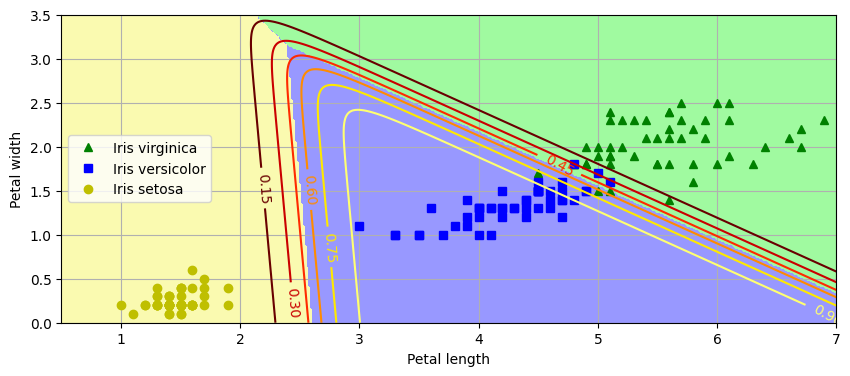

In [12]:
# extra code – this cell generates and saves Figure 4–25
import numpy as np
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([0.5, 7, 0, 3.5])
plt.grid()
plt.show()